In [ ]:
# THIS IS FINAL ONE. IT HAS VGG-16 ARCHITECTURE

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from google.colab import drive
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
synthetic_folder = '/content/drive/MyDrive/Mini_syn_images'

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
def load_and_resize_images(folder, target_size=(32, 32)):
    images = []
    try:
        for filename in os.listdir(folder):
            if filename.endswith(".png"):
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size)
                img_array = np.array(img)
                images.append(img_array)
        return np.array(images)
    except Exception as e:
        print(f"Error loading/resizing images from folder: {e}")
        return None

Mini_syn_images = load_and_resize_images(synthetic_folder)

if Mini_syn_images is not None:
    x_train = np.concatenate([x_train, Mini_syn_images], axis=0)
    y_train = np.concatenate([y_train, np.full((Mini_syn_images.shape[0], 1), -1)], axis=0)

    shuffle_indices = np.random.permutation(len(x_train))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    print("Combined x_train shape:", x_train.shape)
    print("Combined y_train shape:", y_train.shape)
    print("Original x_test shape:", x_test.shape)
    print("Original y_test shape:", y_test.shape)


Combined x_train shape: (50050, 32, 32, 3)
Combined y_train shape: (50050, 1)
Original x_test shape: (10000, 32, 32, 3)
Original y_test shape: (10000, 1)


In [ ]:
print("Number of images in x_train:", len(x_train))
print("Number of labels in y_train:", len(y_train))


Number of images in x_train: 50050
Number of labels in y_train: 50050


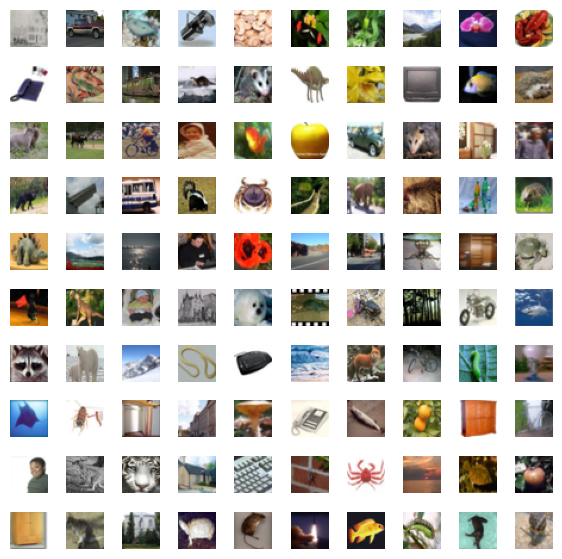

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):
    for j in range(10):
        class_index = random.randint(0, 99)
        class_indices = np.where(y_train[:, 0] == class_index)[0]
        random_index = random.choice(class_indices)
        axes[i, j].imshow(x_train[random_index])
        axes[i, j].axis('off')

plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [ ]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == (self.params['epochs'] - 1):
            accuracy_key = 'accuracy' if 'accuracy' in logs else 'acc'
            print(f'\nTraining accuracy for the last epoch: {logs[accuracy_key]:.4f}')


In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[es, CustomCallback()])

Epoch 1/30
626/626 [==============================] - 9s 10ms/step - loss: 1.0788 - accuracy: 0.6777 - val_loss: 2.4034 - val_accuracy: 0.4464
Epoch 2/30
626/626 [==============================] - 6s 9ms/step - loss: 1.0589 - accuracy: 0.6827 - val_loss: 2.4571 - val_accuracy: 0.4424
Epoch 3/30
626/626 [==============================] - 6s 10ms/step - loss: 1.0492 - accuracy: 0.6849 - val_loss: 2.4078 - val_accuracy: 0.4439
Epoch 4/30
626/626 [==============================] - 5s 9ms/step - loss: 1.0496 - accuracy: 0.6860 - val_loss: 2.3966 - val_accuracy: 0.4465
Epoch 5/30
626/626 [==============================] - 6s 10ms/step - loss: 1.0457 - accuracy: 0.6863 - val_loss: 2.4490 - val_accuracy: 0.4432
Epoch 6/30
626/626 [==============================] - 5s 9ms/step - loss: 1.0299 - accuracy: 0.6923 - val_loss: 2.4280 - val_accuracy: 0.4497
Epoch 7/30
626/626 [==============================] - 6s 10ms/step - loss: 1.0438 - accuracy: 0.6887 - val_loss: 2.3908 - val_accuracy: 0.4511
Ep

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 [==============================] - 1s 3ms/step - loss: 2.4212 - accuracy: 0.4483
Test accuracy: 0.45


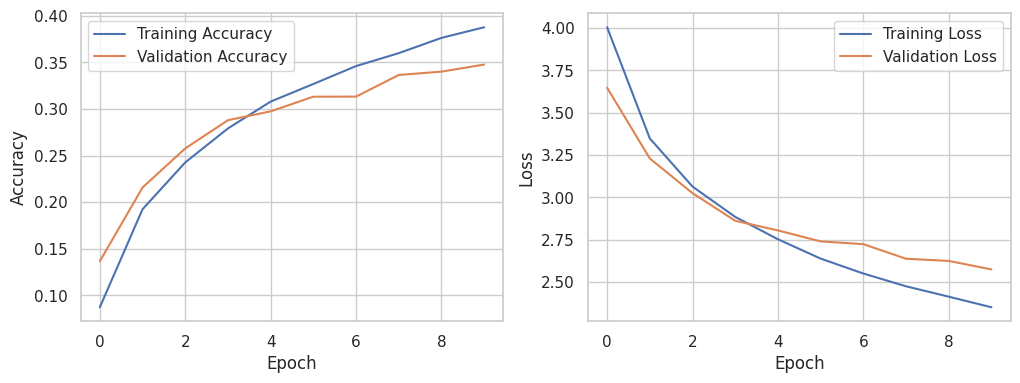

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
